In [1]:
import pandas as pd
import sqlite3
import random
from datetime import datetime, timedelta

# Generate sample data
num_rows = 100  # You can increase this if needed
start_date = datetime(2023, 1, 1)

data = []

for i in range(1, num_rows + 1):
    order_date = start_date + timedelta(days=random.randint(0, 364))  # random date in 2023
    order_id = random.randint(1, 30)  # simulate repeated order_ids (same order split by products)
    amount = round(random.uniform(50, 500), 2)
    product_id = random.randint(100, 120)
    
    data.append((order_id, order_date.strftime('%Y-%m-%d'), amount, product_id))

# Create DataFrame
df = pd.DataFrame(data, columns=['order_id', 'order_date', 'amount', 'product_id'])

# Display preview
df.head()


,order_id,order_date,amount,product_id
0,28,2023-11-02,462.09,107
1,26,2023-06-04,63.25,107
2,8,2023-05-17,120.14,116
3,7,2023-08-03,169.91,100
4,30,2023-01-09,165.61,111


In [2]:
# Connect to SQLite database (will create 'sales.db' if it doesn't exist)
conn = sqlite3.connect('sales.db')

# Save table
df.to_sql('online_sales', conn, if_exists='replace', index=False)

# Confirm table creation
print("Table 'online_sales' created with", len(df), "rows.")


Table 'online_sales' created with 100 rows.


In [3]:
query = """
SELECT
  STRFTIME('%Y', order_date) AS order_year,
  STRFTIME('%m', order_date) AS order_month,
  SUM(amount) AS total_revenue,
  COUNT(DISTINCT order_id) AS order_volume
FROM
  online_sales
GROUP BY
  STRFTIME('%Y', order_date),
  STRFTIME('%m', order_date)
ORDER BY
  order_year,
  order_month;
"""

monthly_trend = pd.read_sql_query(query, conn)
monthly_trend


,order_year,order_month,total_revenue,order_volume
0,2023,01,2930.44,9
1,2023,02,1398.31,4
2,2023,03,1540.14,5
3,2023,04,1230.61,5
4,2023,05,3907.11,12
5,2023,06,3535.68,11
6,2023,07,2894.68,7
7,2023,08,2445.20,7
8,2023,09,3171.68,9
9,2023,10,2366.01,6


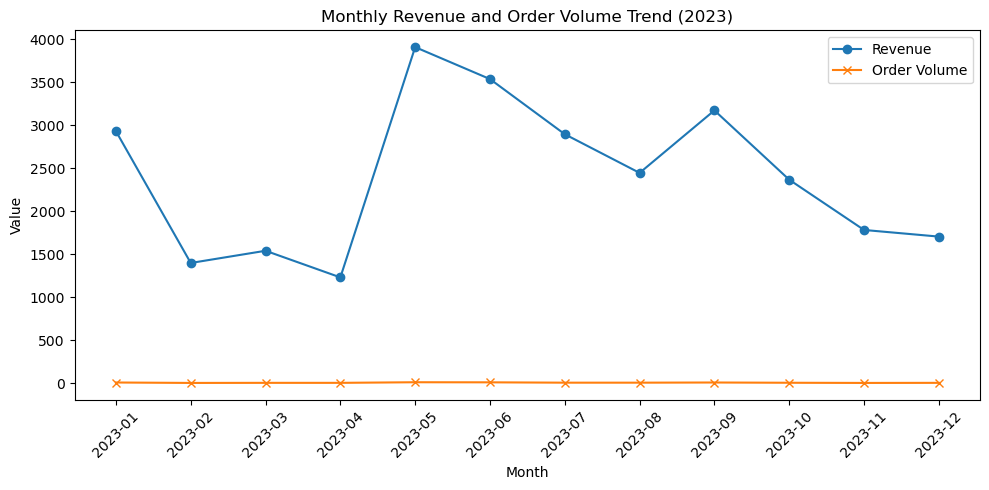

In [4]:
import matplotlib.pyplot as plt

monthly_trend['year_month'] = monthly_trend['order_year'] + '-' + monthly_trend['order_month']

plt.figure(figsize=(10,5))
plt.plot(monthly_trend['year_month'], monthly_trend['total_revenue'], marker='o', label='Revenue')
plt.plot(monthly_trend['year_month'], monthly_trend['order_volume'], marker='x', label='Order Volume')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Monthly Revenue and Order Volume Trend (2023)')
plt.legend()
plt.tight_layout()
plt.show()


In [6]:
monthly_trend.head()  # or just monthly_trend



,order_year,order_month,total_revenue,order_volume,year_month
0,2023,01,2930.44,9,2023-01
1,2023,02,1398.31,4,2023-02
2,2023,03,1540.14,5,2023-03
3,2023,04,1230.61,5,2023-04
4,2023,05,3907.11,12,2023-05


In [7]:
monthly_trend.to_csv("monthly_sales_trend.csv", index=False)
